In [1]:
import os
import datetime
import json
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import difflib

## Data Import  ALD-O

In [47]:
# key = name of the combination， value = {year: {o:xx, c:xx}}
with open('element_ald_H.json') as f:
    ald_H = json.load(f)
with open('element_ald_N.json') as f:
    ald_N = json.load(f)
with open('element_ald_O.json') as f:
    ald_O = json.load(f)
with open('element_ald_S.json') as f:
    ald_S = json.load(f)
    
with open('element_nonald_H.json') as f:
    nonald_H = json.load(f)
with open('element_nonald_N.json') as f:
    nonald_N = json.load(f)
with open('element_nonald_O.json') as f:
    nonald_O = json.load(f)
with open('element_nonald_S.json') as f:
    nonald_S = json.load(f)

In [48]:
df_temp = pd.read_excel(io = 'O_med_temp.xlsx')

In [49]:
ELE = ['Ti', 'Fe', 'Al', 'P', 'Co', 'Li', 'Cu', 'Zn', 'Zr', 'Sn', 'V' ,'La','Ga', 'Ce', 'W']
ELE.sort(reverse=True)
ELE

['Zr',
 'Zn',
 'W',
 'V',
 'Ti',
 'Sn',
 'P',
 'Li',
 'La',
 'Ga',
 'Fe',
 'Cu',
 'Co',
 'Ce',
 'Al']

In [50]:
group_dict = {}
ELE = ['Ti', 'Fe', 'Al', 'P', 'Co', 'Li', 'Cu', 'Zn', 'Zr', 'Sn', 'V' ,'La','Ga', 'Ce', 'W']
#TOP 10 Frequent Element ['Li', 'Ni', 'V', 'Zr', 'Fe', 'Cu', 'Sn', 'Al', 'Zn', 'Ti']
ELE.sort(reverse=True)
l = 15
for i in range (0,15):
    l=l-1
    list1 = []
    for j in range (0,15-l):
        if j == 15-l-1:
            list1.append(ELE[i])
        else:
            list1.append(ELE[i] + '_' + ELE[j])
    group_dict[ELE[i]] = list1
group_dict = dict(sorted(group_dict.items(), key=lambda i:i[0]))
group_dict

{'Al': ['Al_Zr',
  'Al_Zn',
  'Al_W',
  'Al_V',
  'Al_Ti',
  'Al_Sn',
  'Al_P',
  'Al_Li',
  'Al_La',
  'Al_Ga',
  'Al_Fe',
  'Al_Cu',
  'Al_Co',
  'Al_Ce',
  'Al'],
 'Ce': ['Ce_Zr',
  'Ce_Zn',
  'Ce_W',
  'Ce_V',
  'Ce_Ti',
  'Ce_Sn',
  'Ce_P',
  'Ce_Li',
  'Ce_La',
  'Ce_Ga',
  'Ce_Fe',
  'Ce_Cu',
  'Ce_Co',
  'Ce'],
 'Co': ['Co_Zr',
  'Co_Zn',
  'Co_W',
  'Co_V',
  'Co_Ti',
  'Co_Sn',
  'Co_P',
  'Co_Li',
  'Co_La',
  'Co_Ga',
  'Co_Fe',
  'Co_Cu',
  'Co'],
 'Cu': ['Cu_Zr',
  'Cu_Zn',
  'Cu_W',
  'Cu_V',
  'Cu_Ti',
  'Cu_Sn',
  'Cu_P',
  'Cu_Li',
  'Cu_La',
  'Cu_Ga',
  'Cu_Fe',
  'Cu'],
 'Fe': ['Fe_Zr',
  'Fe_Zn',
  'Fe_W',
  'Fe_V',
  'Fe_Ti',
  'Fe_Sn',
  'Fe_P',
  'Fe_Li',
  'Fe_La',
  'Fe_Ga',
  'Fe'],
 'Ga': ['Ga_Zr',
  'Ga_Zn',
  'Ga_W',
  'Ga_V',
  'Ga_Ti',
  'Ga_Sn',
  'Ga_P',
  'Ga_Li',
  'Ga_La',
  'Ga'],
 'La': ['La_Zr',
  'La_Zn',
  'La_W',
  'La_V',
  'La_Ti',
  'La_Sn',
  'La_P',
  'La_Li',
  'La'],
 'Li': ['Li_Zr', 'Li_Zn', 'Li_W', 'Li_V', 'Li_Ti', 'Li_Sn', 'Li_P', '

In [51]:
Periods = [3, 6, 4, 4, 4, 4, 6, 2, 3, 5, 4, 4, 6 , 4, 5]
Es   =    [2, 2, 2, 2, 6, 2, 2, 1, 2, 2, 2, 3, 2 , 2, 2]
Ed   =    [0, 4, 7,10, 2, 0,10, 0, 0, 2, 2, 2, 4 ,10, 2]
Ep   =    [1, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0 , 0, 0]
Periods.reverse()
Es.reverse()
Ed.reverse()
Ep.reverse()
#update Ef in next version

In [52]:
# calculation of the freqency of from 2000 to 2021
def return_freq(com, acc_dict): #com: chemical element combination #acc_dic: dataset disctionary
    freqs = 0
    for i in acc_dict[com].keys():
        if 'o' in acc_dict[com][i].keys():
            freqs += acc_dict[com][i]['o']
        if 'c' in acc_dict[com][i].keys():
            freqs += acc_dict[com][i]['c']
    return freqs
#calculation of the frequency from 2000 to end year
def return_freq_end(com, acc_dict, end): # end: end year
    freqs = 0
    for year in range(2000, end):
        if str(year) in acc_dict[com].keys():
            if 'o' in acc_dict[com][str(year)].keys():
                freqs += acc_dict[com][str(year)]['o']
            if 'c' in acc_dict[com][str(year)].keys():
                freqs += acc_dict[com][str(year)]['c']
    return freqs
#calculation of the element combination from 2000 to end year
#different with Baseline Prediction appear_ele function
def appear_ele(com, acc_dict, end): # end: end year
    appear_com = []
    for year in range(2000, end+1):
        if com in acc_dict.keys():
            if str(year) in acc_dict[com].keys():
                if 'o' or 'c' in acc_dict[com][str(year)].keys():
                    appear_com = com
    return appear_com
# which year new material come out 
def new_appear(acc_ald_dict, acc_nonald_dict, end): #ald_ele, noald_ele
    all_com = []
    i = 2000
    for com in acc_ald_dict.keys():
        for i in range (2000,end):
            if str(i) in acc_ald_dict[com].keys():
                all_com.append(com)         
    return all_com

In [53]:
i=0
j=0
data_NM = []
for y in range(2012,2022): #Start Year
    data = ['','']
    data_appear = []
    l=15
    for i in range(0,15):
        l = l-1
        for j in range(0,15-l):
            data_appear.append(appear_ele(group_dict[ELE[i]][j],ald_O, y))
    l=15
    i=0
    j=0
    for i in range(0,15):
        l = l-1
        for j in range(0,15-l):
            appear = new_appear(ald_O, nonald_O, y)
            temp = pd.to_numeric(df_temp.loc[df_temp['ELE'] == group_dict[ELE[i]][j]].TEM.squeeze())
            for a in ald_O.keys():
                if a in appear or a in data_appear:
                    appear_a = 1
                else:
                    appear_a = 0
                if group_dict[ELE[i]][j] == a:
                    if str(y) in ald_O[a].keys():
                        data_O,data_C = 0,0
                        if 'o' in ald_O[a][str(y)].keys():
                            data_O = ald_O[a][str(y)]['o']
                        if 'c' in ald_O[a][str(y)].keys() :
                            data_C = ald_O[a][str(y)]['c']
                        data = [y,group_dict[ELE[i]][j],
                                ELE[i],Periods[i],Es[i],Ed[i],Ep[i],
                                ELE[j],Periods[j],Es[j],Ed[j],Ep[j],
                                data_O,data_C,temp,appear_a]
                        data_NM.append(data)
                    else:
                        data = [y,group_dict[ELE[i]][j],
                                ELE[i],Periods[i],Es[i],Ed[i],Ep[i],
                                ELE[j],Periods[j],Es[j],Ed[j],Ep[j],
                                0,0,temp,appear_a]
                        data_NM.append(data)
            if group_dict[ELE[i]][j] != data[1]:
                data = [y,group_dict[ELE[i]][j],
                        ELE[i],Periods[i],Es[i],Ed[i],Ep[i],
                        ELE[j],Periods[j],Es[j],Ed[j],Ep[j],
                        0,0,temp,appear_a]
                data_NM.append(data)
df_name = ['year','e1_e2',
           'e1','e1_Periods','e1_s','e1_d','e1_p',
           'e2','e2_Periods','e2_s','e2_d','e2_p',
           'pos','neg','temp','appear']

df_org= pd.DataFrame (data_NM,columns = df_name)

In [54]:
df = df_org
df['temp'] =  pd.to_numeric(df['temp'])
df.dtypes

year            int64
e1_e2          object
e1             object
e1_Periods      int64
e1_s            int64
e1_d            int64
e1_p            int64
e2             object
e2_Periods      int64
e2_s            int64
e2_d            int64
e2_p            int64
pos             int64
neg             int64
temp          float64
appear          int64
dtype: object

In [55]:
df[0:1200:120]

,year,e1_e2,e1,e1_Periods,e1_s,e1_d,e1_p,e2,e2_Periods,e2_s,e2_d,e2_p,pos,neg,temp,appear
0,2012,Zr,Zr,5,2,2,0,Zr,5,2,2,0,19,7,1100.0,1
120,2013,Zr,Zr,5,2,2,0,Zr,5,2,2,0,84,21,1100.0,1
240,2014,Zr,Zr,5,2,2,0,Zr,5,2,2,0,73,13,1100.0,1
360,2015,Zr,Zr,5,2,2,0,Zr,5,2,2,0,57,8,1100.0,1
480,2016,Zr,Zr,5,2,2,0,Zr,5,2,2,0,71,7,1100.0,1
600,2017,Zr,Zr,5,2,2,0,Zr,5,2,2,0,48,14,1100.0,1
720,2018,Zr,Zr,5,2,2,0,Zr,5,2,2,0,36,5,1100.0,1
840,2019,Zr,Zr,5,2,2,0,Zr,5,2,2,0,53,11,1100.0,1
960,2020,Zr,Zr,5,2,2,0,Zr,5,2,2,0,107,25,1100.0,1
1080,2021,Zr,Zr,5,2,2,0,Zr,5,2,2,0,127,18,1100.0,1


In [56]:
df_e1_e2 = df.pop('e1_e2')
df_e1 = df.pop('e1')
df_e2 = df.pop('e2')
df_temp = df.pop('temp')
df

,year,e1_Periods,e1_s,e1_d,e1_p,e2_Periods,e2_s,e2_d,e2_p,pos,neg,appear
0,2012,5,2,2,0,5,2,2,0,19,7,1
1,2012,4,2,10,0,5,2,2,0,0,0,0
2,2012,4,2,10,0,4,2,10,0,121,20,1
3,2012,6,2,4,0,5,2,2,0,0,0,0
4,2012,6,2,4,0,4,2,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021,3,2,0,1,4,6,2,0,0,0,1
1196,2021,3,2,0,1,4,2,10,0,3,0,1
1197,2021,3,2,0,1,4,2,7,0,4,0,1
1198,2021,3,2,0,1,6,2,4,0,0,0,1


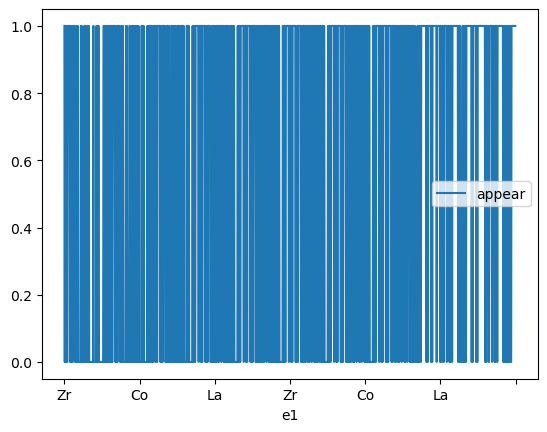

In [57]:
plot_cols = ['appear']
plot_features = df[plot_cols]
plot_features.index = df_e1
_ = plot_features.plot(subplots=True)

## dataset generation

In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1200.0,2016.500000,2.873479,2012.0,2014.00,2016.5,2019.0,2021.0
e1_Periods,1200.0,4.175000,1.159955,2.0,3.75,4.0,5.0,6.0
e1_s,1200.0,2.333333,1.206967,1.0,2.00,2.0,2.0,6.0
e1_d,1200.0,3.691667,3.744990,0.0,0.00,2.0,7.0,10.0
e1_p,1200.0,0.458333,0.773798,0.0,0.00,0.0,1.0,3.0
e2_Periods,1200.0,4.358333,1.078997,2.0,4.00,4.0,5.0,6.0
e2_s,1200.0,2.200000,0.891064,1.0,2.00,2.0,2.0,6.0
e2_d,1200.0,3.641667,3.545947,0.0,2.00,2.0,4.0,10.0
e2_p,1200.0,0.341667,0.821884,0.0,0.00,0.0,0.0,3.0
pos,1200.0,13.835833,54.638143,0.0,0.00,0.0,1.0,566.0


In [59]:
def pos_neg(x):
    if x['neg'] == 0: 
        return 0
    else:
        return x['pos']/x['neg']
def pos_total(x):
    if x['neg'] == 0 and x['pos'] == 0  : 
        return 0
    else:
        return x['pos']/(x['neg']+x['pos'])
def neg_total(x):
    if x['neg'] == 0 and x['pos'] == 0  : 
        return 0
    else:
        return x['neg']/(x['neg']+x['pos'])
    

In [60]:
df['pos/neg'] = df.apply(pos_neg, axis=1)
df['pos/total'] = df.apply(pos_total, axis=1)
df['neg/total'] = df.apply(neg_total, axis=1)
df['year_nor'] = df['year'] - 2014
df

,year,e1_Periods,e1_s,e1_d,e1_p,e2_Periods,e2_s,e2_d,e2_p,pos,neg,appear,pos/neg,pos/total,neg/total,year_nor
0,2012,5,2,2,0,5,2,2,0,19,7,1,2.714286,0.730769,0.269231,-2
1,2012,4,2,10,0,5,2,2,0,0,0,0,0.000000,0.000000,0.000000,-2
2,2012,4,2,10,0,4,2,10,0,121,20,1,6.050000,0.858156,0.141844,-2
3,2012,6,2,4,0,5,2,2,0,0,0,0,0.000000,0.000000,0.000000,-2
4,2012,6,2,4,0,4,2,10,0,0,0,0,0.000000,0.000000,0.000000,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021,3,2,0,1,4,6,2,0,0,0,1,0.000000,0.000000,0.000000,7
1196,2021,3,2,0,1,4,2,10,0,3,0,1,0.000000,1.000000,0.000000,7
1197,2021,3,2,0,1,4,2,7,0,4,0,1,0.000000,1.000000,0.000000,7
1198,2021,3,2,0,1,6,2,4,0,0,0,1,0.000000,0.000000,0.000000,7


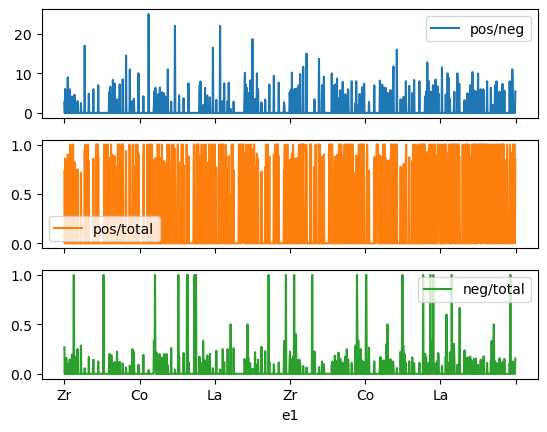

In [61]:
plot_cols = ['pos/neg', 'pos/total','neg/total']
plot_features = df[plot_cols]
plot_features.index = df_e1
_ = plot_features.plot(subplots=True)

In [62]:
df_pos = df.pop('pos')
df_neg = df.pop('neg')

In [63]:
df_year = df.pop('year')

## split

In [64]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

## Data windowing
### 1. Indexes and Offsets

In [65]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

## Data windowing
### 2.Split

In [66]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

### Create tf.data.Datasets

In [67]:
def make_dataset1(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=16,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset1 = make_dataset1

In [68]:
@property
def train(self):
  return self.make_dataset1(self.train_df)

@property
def val(self):
  return self.make_dataset1(self.val_df)

@property
def test(self):
  return self.make_dataset1(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

## LSTM

In [69]:
wide_window = WindowGenerator(
    input_width=9, label_width=9, shift=1,
    label_columns=['pos/neg','pos/total','neg/total','appear'])

wide_window

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [1 2 3 4 5 6 7 8 9]
Label column name(s): ['pos/neg', 'pos/total', 'neg/total', 'appear']

In [70]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [71]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (16, 9, 13)
Output shape: (16, 9, 1)


In [72]:
## LSTM Model 1
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min',
                                                    )

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [73]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance = {}
performance = {}
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

15/15 [==============================] - 0s 7ms/step - loss: 2.1168 - mean_absolute_error: 0.6875


In [74]:
def model_forecast(model, series, window_size):
    """This function converts the input series into a dataset with time windows for forecasting"""
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

     12/Unknown - 0s 5ms/step  

2023-01-26 14:48:34.378989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-26 14:48:34.431274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 5ms/step


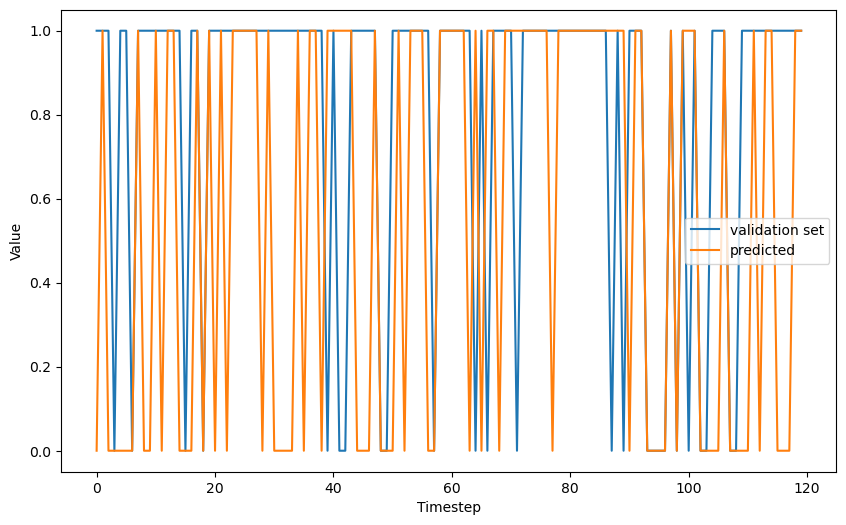

0.13333333333333333
0.48333333333333334
0.6166666666666667


In [75]:
class G:
    WINDOW_SIZE = 1
all_forecast = model_forecast(lstm_model,df,1).squeeze()
for i in range(0,len(all_forecast)):
    if all_forecast[i] < 0.35:
        all_forecast[i] = 0
    else:
        all_forecast[i] = 1
results = df_org.appear.values.tolist()
plt.figure(figsize=(10, 6))
plt.plot(results[1080:1200], label="validation set")
plt.plot(all_forecast[1080:1200], label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()
a = results[1080:1200]
b = all_forecast[1080:1200]
c_0 = 0
c_1 = 0
c_t = 0
for i in range(0,len(a)):
    if a[i] == b[i]:
        c_t = c_t+1
        if b[i] == 0:
            c_0 = c_0+1
        if b[i] == 1:
            c_1 = c_1+1
print(c_0/120)
print(c_1/120)
print(c_t/120)


38/38 [==============================] - 0s 5ms/step


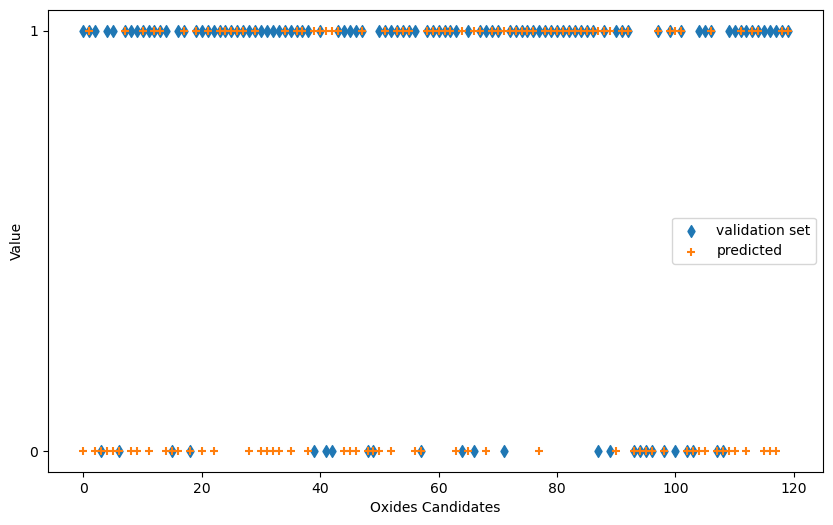

0.13333333333333333
0.6105263157894737
0.6166666666666667
67
95


In [133]:
class G:
    WINDOW_SIZE = 1
all_forecast = model_forecast(lstm_model,df,1).squeeze()
for i in range(0,len(all_forecast)):
    if all_forecast[i] < 0.35:
        all_forecast[i] = 0
    else:
        all_forecast[i] = 1
results = df_org.appear.values.tolist()
plt.figure(figsize=(10, 6))
plt.scatter(list(range(120)),results[1080:1200],label="validation set",marker ='d')
plt.scatter(list(range(120)),all_forecast[1080:1200],label="predicted",marker = '+' )
plt.xlabel("Oxides Candidates")
plt.ylabel('Value')
plt.yticks([0,1])
plt.legend()
plt.show()
a = results[1080:1200]
b = all_forecast[1080:1200]
c_0 = 0
c_1 = 0
c_t = 0
b_1 = 0
a_1 = 0
for i in range(0,len(a)):
    if a[i] ==1:
        a_1 += 1
    if b[i] == 1:
        b_1 += 1
    if a[i] == b[i]:
        c_t = c_t+1
        if b[i] == 0:
            c_0 = c_0+1
        if b[i] == 1:
            c_1 = c_1+1
print(c_0/120)
print(c_1/95)
print(c_t/120)
print(b_1)
print(a_1)

In [132]:
34/95

0.35789473684210527

In [83]:
index = np.arange(0,120,1)
df_2021_ANS = df_org[1080:1200]
df_2021_ANS.set_index(index,inplace=True) 
print(df_2021_ANS)
df_blank = df_org[0:120]

     e1_Periods  e1_s  e1_d  e1_p  e2_Periods  e2_s  e2_d  e2_p  appear  \
0             5     2     2     0           5     2     2     0       1   
1             4     2    10     0           5     2     2     0       1   
2             4     2    10     0           4     2    10     0       1   
3             6     2     4     0           5     2     2     0       0   
4             6     2     4     0           4     2    10     0       1   
..          ...   ...   ...   ...         ...   ...   ...   ...     ...   
115           3     2     0     1           4     6     2     0       1   
116           3     2     0     1           4     2    10     0       1   
117           3     2     0     1           4     2     7     0       1   
118           3     2     0     1           6     2     4     0       1   
119           3     2     0     1           3     2     0     1       1   

      pos/neg  pos/total  neg/total  year_nor  
0    7.055556   0.875862   0.124138         7  
1  

In [89]:
df_2021_appear = df_2021_ANS.appear
df_blank.appear = 0
df_blank.year_nor = 8
df_blank['pos/neg'] = 0
df_blank['pos/total'] = 0
df_blank['neg/total'] = 0


/var/folders/ym/l8ht9s4x5gld9x68wypzwwnc0000gq/T/ipykernel_3749/1819167118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blank.appear = 0
/var/folders/ym/l8ht9s4x5gld9x68wypzwwnc0000gq/T/ipykernel_3749/1819167118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blank.year_nor = 8
/var/folders/ym/l8ht9s4x5gld9x68wypzwwnc0000gq/T/ipykernel_3749/1819167118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [90]:
print(df_blank)

     e1_Periods  e1_s  e1_d  e1_p  e2_Periods  e2_s  e2_d  e2_p  appear  \
0             5     2     2     0           5     2     2     0       0   
1             4     2    10     0           5     2     2     0       0   
2             4     2    10     0           4     2    10     0       0   
3             6     2     4     0           5     2     2     0       0   
4             6     2     4     0           4     2    10     0       0   
..          ...   ...   ...   ...         ...   ...   ...   ...     ...   
115           3     2     0     1           4     6     2     0       0   
116           3     2     0     1           4     2    10     0       0   
117           3     2     0     1           4     2     7     0       0   
118           3     2     0     1           6     2     4     0       0   
119           3     2     0     1           3     2     0     1       0   

     pos/neg  pos/total  neg/total  year_nor  
0          0          0          0         8  
1    

4/4 [==============================] - 0s 13ms/step


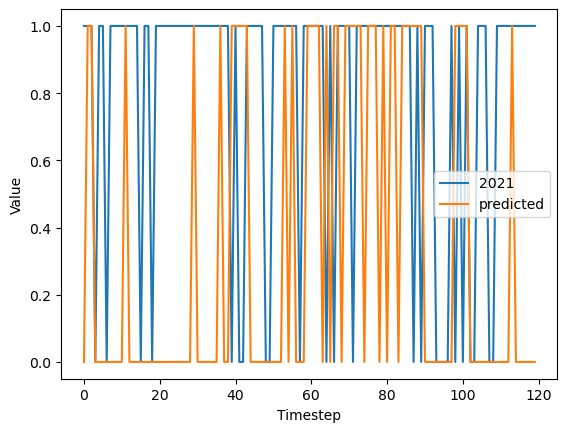

0.64486074
[[2021, 'La_V', 'La', 6, 2, 10, 1, 'V', 4, 3, 2, 0, 0, 0, 960.0, 0]]
0.38047194
[[2021, 'La_Sn', 'La', 6, 2, 10, 1, 'Sn', 5, 2, 2, 0, 0, 0, 1000.0, 0]]
0.5588575
[[2021, 'La_P', 'La', 6, 2, 10, 1, 'P', 3, 2, 0, 3, 0, 0, 1100.0, 0]]
0.6519406
[[2021, 'Fe_Ga', 'Fe', 4, 6, 2, 0, 'Ga', 4, 2, 0, 1, 0, 0, 1100.0, 0]]
0.41405934
[[2021, 'Cu_Zr', 'Cu', 4, 2, 10, 0, 'Zr', 5, 2, 2, 0, 0, 0, 900.0, 0]]
0.41405934
[[2021, 'Cu_Sn', 'Cu', 4, 2, 10, 0, 'Sn', 5, 2, 2, 0, 0, 0, 960.0, 0]]
0.5168272
[[2021, 'Co_Ga', 'Co', 4, 2, 7, 0, 'Ga', 4, 2, 0, 1, 0, 0, 1150.0, 0]]
0.42057067
[[2021, 'Co_Cu', 'Co', 4, 2, 7, 0, 'Cu', 4, 2, 10, 0, 0, 0, 900.0, 0]]
0.35883486
[[2021, 'Ce_Li', 'Ce', 6, 2, 4, 0, 'Li', 2, 1, 0, 0, 0, 0, 850.0, 0]]
0.42316848
[[2021, 'Ce_Ga', 'Ce', 6, 2, 4, 0, 'Ga', 4, 2, 0, 1, 0, 0, 1200.0, 0]]
0.2029502
[[2021, 'Zr', 'Zr', 5, 2, 2, 0, 'Zr', 5, 2, 2, 0, 127, 18, 1100.0, 1]]
0.41405934
[[2021, 'Zn_Zr', 'Zn', 4, 2, 10, 0, 'Zr', 5, 2, 2, 0, 0, 0, 1050.0, 1]]
0.44657457
[[2021, 'Zn

In [94]:
#Predicting 2022
new_forecast = []
i=0
j=0
data_2022= []
y = 8
#ELE_R = ELE[::-1]
l=15
ans = df_2021_appear
df_name_2022 = ['year','e1_e2',
           'e1','e1_Periods','e1_s','e1_d','e1_p',
           'e2','e2_Periods','e2_s','e2_d','e2_p',
           'appear','pos/neg','pos/total','neg/total']

#df_2022_Pre = pd.DataFrame (data_2022,columns = df_name_2022)

pred = model_forecast(lstm_model,df_blank,1).squeeze()
pred_nor = [[]] *120
for i in range(0,len(pred)):
    if pred[i] < 0.35:
        pred_nor[i] = 0
    else:
        pred_nor[i] = 1
plt.plot(ans, label="2021")
plt.plot(pred_nor, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()
 
for i in range(0,len(pred)):
    if pred_nor[i] ==1 and ans[i] == 0:
        print(pred[i])
        print(data_NM[i+1080:i+1081])

In [106]:
df_org= pd.DataFrame (data_NM,columns = df_name)
output_ans = df_org[1080:1200]
output_ans.to_csv(r'answer.csv',encoding='utf-8')